In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re

In [20]:
with open("NEW_CL__Kp_13d9__Ki_33d1.txt", "r") as file:
    raw_data = file.read().strip().split("Mode")[1:-2]

ndata = len(raw_data)
columns = list(map(lambda x: (x.split(" = ")[0]), raw_data[0].strip().split("\n")[1:]))
columns = ["Mode", *columns]

data_mode = ndata*[""]
data_np = np.zeros((len(columns)-1, ndata))

for i in range(ndata):
    spi_in_str = False
    current = raw_data[i]
    if ("SPI" in raw_data[i]):
        spi_in_str = True
        current = re.sub("SPI.*", "", raw_data[i], flags=re.S)
    if ("query" in raw_data[i]):
        current = re.sub("query.*\n", "", current)   
    if ("\na = " in raw_data[i]):
        current = re.sub("\na = .*", "\n", current, flags=re.S)
    if ("\nstate is" in raw_data[i]):
        current = re.sub("\nstate is.*", "\n", current, flags=re.S) 
    try:  
        splitted_data = current.strip().split("\n")
        mode = splitted_data[0].strip()
        data_mode[i] = mode
        data_np[:,i] = list(map(lambda x: float(x.split(" = ")[-1]), splitted_data[1:]))

    except:
        print("Error parsing sample number ", i, "\n")
        print(raw_data[i])
        print(current)
        break

data = pd.DataFrame(data_np.T, columns=columns[1:])
data.insert(0,"time",data["dt"],False)
data.insert(0,"Mode",data_mode,False)

data

,Mode,time,dt,xpos,ypos,thetapos,vfwd,speed_left,speed_right,dc left,dc right,tickl,tickr
0,idle,420.975,420.975,-0.025024,0.003548,-0.273376,0.0,0.0,0.0,0.0,0.0,-1041.0,-33331.0
1,idle,420.976,420.976,-0.025024,0.003548,-0.273376,0.0,0.0,0.0,0.0,0.0,-1041.0,-33331.0
2,idle,420.977,420.977,-0.025024,0.003548,-0.273376,0.0,0.0,0.0,0.0,0.0,-1041.0,-33331.0
3,idle,420.978,420.978,-0.025024,0.003548,-0.273376,0.0,0.0,0.0,0.0,0.0,-4339.0,-31647.0
4,idle,453.307,453.307,-0.026185,0.003812,-0.231197,0.0,0.0,0.0,0.0,0.0,-4339.0,-31647.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11978,SpeedControl,469.643,469.643,0.807621,-0.197176,-0.216948,0.0,0.0,0.0,256.0,256.0,576153.0,550528.0
11979,SpeedControl,469.644,469.644,0.807621,-0.197176,-0.216948,0.0,0.0,0.0,256.0,256.0,576153.0,550528.0
11980,SpeedControl,469.645,469.645,0.807621,-0.197176,-0.216948,0.0,0.0,0.0,256.0,256.0,576153.0,550528.0
11981,SpeedControl,469.646,469.646,0.807621,-0.197176,-0.216948,0.0,0.0,0.0,256.0,256.0,576153.0,550528.0


In [26]:
mask = data["Mode"] != "idle"
t0 = data["time"][mask].iloc[0]
data = data[mask]

data.loc[:,"time"] = data["time"].iloc[:] - t0
mask = np.logical_and(mask, data["time"] <= 0.8)
data = data[mask]
data

,Mode,time,dt,xpos,ypos,thetapos,vfwd,speed_left,speed_right,dc left,dc right,tickl,tickr
7532,SpeedControl,0.000,463.530,-0.026185,0.003812,-0.231197,0.000000,0.000000,0.000000,0.0,0.0,-4339.0,-31647.0
7533,SpeedControl,0.001,463.531,-0.026185,0.003812,-0.231197,0.000000,0.000000,0.000000,50.0,50.0,-4339.0,-31646.0
7534,SpeedControl,0.002,463.532,-0.026184,0.003812,-0.231188,0.000738,0.000000,0.001475,100.0,100.0,-4329.0,-31632.0
7535,SpeedControl,0.003,463.533,-0.026167,0.003808,-0.231155,0.017705,0.014754,0.020655,150.0,150.0,-4300.0,-31599.0
7536,SpeedControl,0.004,463.534,-0.026123,0.003797,-0.231121,0.045737,0.042786,0.048688,200.0,200.0,-4238.0,-31528.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8149,SpeedControl,0.795,464.325,0.195933,-0.050023,-0.235566,0.286963,0.280324,0.293602,123.0,110.0,151019.0,123203.0
8150,SpeedControl,0.796,464.326,0.196214,-0.050090,-0.235498,0.289176,0.283275,0.295078,153.0,113.0,151217.0,123404.0
8151,SpeedControl,0.797,464.327,0.196500,-0.050159,-0.235472,0.294340,0.292127,0.296553,143.0,107.0,151426.0,123607.0
8152,SpeedControl,0.798,464.328,0.196796,-0.050230,-0.235523,0.303930,0.308356,0.299504,112.0,102.0,151633.0,123807.0


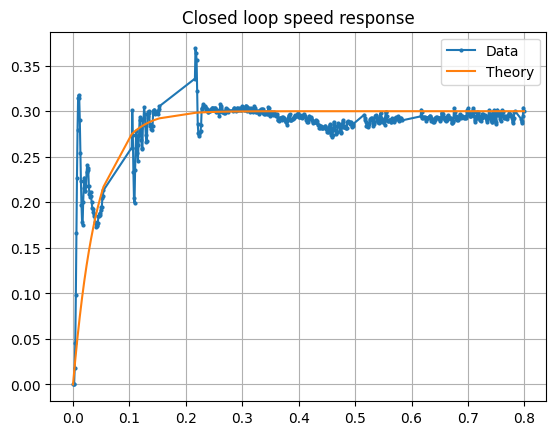

In [28]:
tau = 0.42/10
A = 0.3
speed_resp_th = A*(1-np.exp(-data["time"]/tau))
plt.title("Closed loop speed response")
plt.plot(data['time'], data["vfwd"], '-o', markersize=2, label="Data")
plt.plot(data["time"], speed_resp_th, label="Theory")
plt.legend()
plt.grid()
# plt.xlim(0.6,0.8)
plt.show()

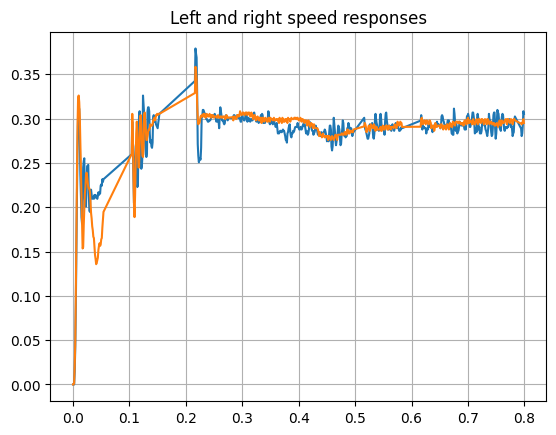

In [29]:
plt.title("Left and right speed responses")
plt.plot(data['time'], data["speed_left"], label="left speed")
plt.plot(data['time'], data["speed_right"], label="right speed")
plt.grid()
plt.show()